In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import decoding_analysis_vis as dav
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dav.get_session_names(sess_type='sens')

['2020-09-04_RL093.pkl',
 '2020-09-08_RL099.pkl',
 '2020-09-14_RL101.pkl',
 '2020-09-16_RL103.pkl',
 '2020-10-02_RL108.pkl',
 '2020-10-12_RL109.pkl']

In [337]:
tmp = dav.SimpleSession(verbose=1)

session name : 2020-09-04_RL093.pkl
Excluded 302 out of 2097 neurons


In [376]:
tmp_s = tmp.dataset_selector(region='s2', min_t=-1, trial_type_list=['sensory'], 
                               remove_added_dimensions=True, sort_neurons=True, reset_sort=False)

In [366]:
tmp_r = tmp.dataset_selector(region='s2', min_t=-1, trial_type_list=['random'], 
                               remove_added_dimensions=True, sort_neurons=False)

In [367]:
tmp_plot = tmp_s.activity.mean('trial').data - tmp_r.activity.mean('trial').data
# tmp_sort = tmp.sort_neurons(data=tmp_plot, sorting_method='correlation')
# print(tmp_sort)

<AxesSubplot:>

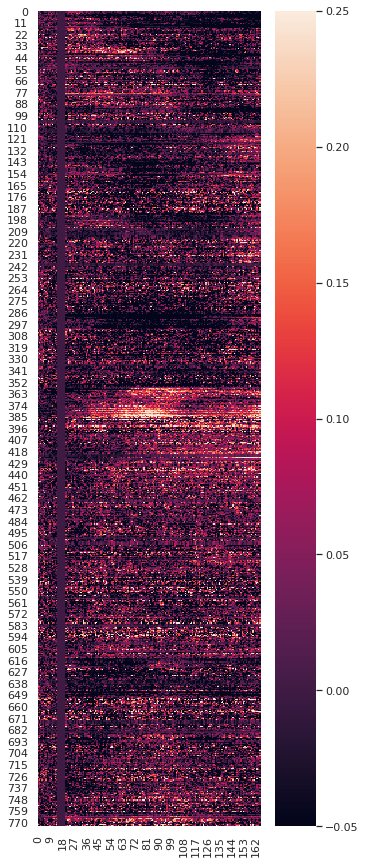

In [368]:
# tmp_plot = tmp_s.activity.mean('trial').data - tmp_r.activity.mean('trial').data
# tmp_plot = tmp_plot[tmp_sort, :]
fig, ax = plt.subplots(1, 1, figsize=(5, 15))
sns.heatmap(tmp_plot[:, :],
           vmin=-0.05, vmax=0.25, ax=ax)

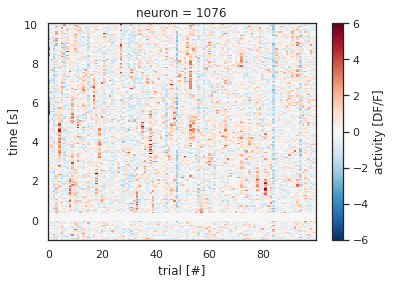

In [369]:
# fig, ax = plt.subplots(1, 2, figsize=(4, 10))
tmp_s.activity.isel(neuron=494).plot()

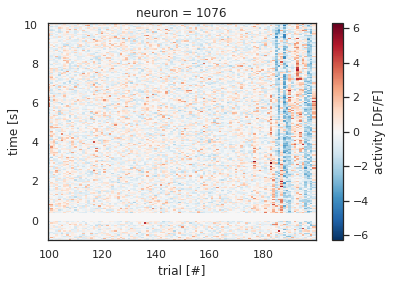

In [370]:

tmp_r.activity.isel(neuron=494).plot()